<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.164422,90.875992,3.694429,189.734842,188.055943,1.678899
1,0.0,1.0,38.253125,75.773308,-17.772721,106.253713,122.181841,-15.928128
2,0.0,2.0,82.293918,70.070071,-13.453706,148.910282,165.055629,-16.145346
3,0.0,3.0,46.345856,91.957439,-1.321235,146.982059,146.501532,0.480527
4,0.0,4.0,83.497284,48.568308,-2.258484,139.807108,145.860675,-6.053567
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,89.583240,64.190184,0.191593,163.965016,161.685823,2.279193
59996,999.0,56.0,46.934582,84.644731,9.066790,150.646103,136.706313,13.939790
59997,999.0,57.0,61.500576,78.754478,-6.566482,143.688572,146.262211,-2.573639
59998,999.0,58.0,29.965133,49.009985,-5.394100,83.581019,85.836468,-2.255449


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.164422,90.875992,3.694429,189.734842,188.055943,1.678899
1,0.0,1.0,38.253125,75.773308,-17.772721,106.253713,122.181841,-15.928128
2,0.0,2.0,82.293918,70.070071,-13.453706,148.910282,165.055629,-16.145346
3,0.0,3.0,46.345856,91.957439,-1.321235,146.982059,146.501532,0.480527
4,0.0,4.0,83.497284,48.568308,-2.258484,139.807108,145.860675,-6.053567
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,89.583240,64.190184,0.191593,163.965016,161.685823,2.279193
59996,999.0,56.0,46.934582,84.644731,9.066790,150.646103,136.706313,13.939790
59997,999.0,57.0,61.500576,78.754478,-6.566482,143.688572,146.262211,-2.573639
59998,999.0,58.0,29.965133,49.009985,-5.394100,83.581019,85.836468,-2.255449


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    85.164422  90.875992   3.694429  189.734842  188.055943   
      1.0    38.253125  75.773308 -17.772721  106.253713  122.181841   
      2.0    82.293918  70.070071 -13.453706  148.910282  165.055629   
      3.0    46.345856  91.957439  -1.321235  146.982059  146.501532   
      4.0    83.497284  48.568308  -2.258484  139.807108  145.860675   
...                ...        ...        ...         ...         ...   
999.0 55.0   89.583240  64.190184   0.191593  163.965016  161.685823   
      56.0   46.934582  84.644731   9.066790  150.646103  136.706313   
      57.0   61.500576  78.754478  -6.566482  143.688572  146.262211   
      58.0   29.965133  49.009985  -5.394100   83.581019   85.836468   
      59.0   96.450181  36.513150   0.843982  143.807313  142.907677   

                 e_hat  
rep   index             
0.0   0.0     1.678899  
      1.0   -15.928128  
      2.0   -16.145346  
      3.0     0.480527  
      4.0    -6.053567  
...                ...  
999.0 55.0    2.279193  
      56.0   13.939790  
      57.0   -2.573639  
      58.0   -2.255449  
      59.0    0.899636  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    85.164422  90.875992   3.694429  189.734842  188.055943   
      1.0    38.253125  75.773308 -17.772721  106.253713  122.181841   
      2.0    82.293918  70.070071 -13.453706  148.910282  165.055629   
      3.0    46.345856  91.957439  -1.321235  146.982059  146.501532   
      4.0    83.497284  48.568308  -2.258484  139.807108  145.860675   
...                ...        ...        ...         ...         ...   
999.0 55.0   89.583240  64.190184   0.191593  163.965016  161.685823   
      56.0   46.934582  84.644731   9.066790  150.646103  136.706313   
      57.0   61.500576  78.754478  -6.566482  143.688572  146.262211   
      58.0   29.965133  49.009985  -5.394100   83.581019   85.836468   
      59.0   96.450181  36.513150   0.843982  143.807313  142.907677   

                 e_hat  
rep   index             
0.0   0.0     1.678899  
      1.0   -15.928128  
      2.0   -16.145346  
      3.0     0.480527  
      4.0    -6.053567  
...                ...  
999.0 55.0    2.279193  
      56.0   13.939790  
      57.0   -2.573639  
      58.0   -2.255449  
      59.0    0.899636  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.164422,90.875992,3.694429,189.734842,188.055943,1.678899
1,0.0,1.0,38.253125,75.773308,-17.772721,106.253713,122.181841,-15.928128
2,0.0,2.0,82.293918,70.070071,-13.453706,148.910282,165.055629,-16.145346
3,0.0,3.0,46.345856,91.957439,-1.321235,146.982059,146.501532,0.480527
4,0.0,4.0,83.497284,48.568308,-2.258484,139.807108,145.860675,-6.053567
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,89.583240,64.190184,0.191593,163.965016,161.685823,2.279193
59996,999.0,56.0,46.934582,84.644731,9.066790,150.646103,136.706313,13.939790
59997,999.0,57.0,61.500576,78.754478,-6.566482,143.688572,146.262211,-2.573639
59998,999.0,58.0,29.965133,49.009985,-5.394100,83.581019,85.836468,-2.255449


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    85.164422  90.875992   3.694429  189.734842  188.055943   
      1.0    38.253125  75.773308 -17.772721  106.253713  122.181841   
      2.0    82.293918  70.070071 -13.453706  148.910282  165.055629   
      3.0    46.345856  91.957439  -1.321235  146.982059  146.501532   
      4.0    83.497284  48.568308  -2.258484  139.807108  145.860675   
...                ...        ...        ...         ...         ...   
999.0 55.0   89.583240  64.190184   0.191593  163.965016  161.685823   
      56.0   46.934582  84.644731   9.066790  150.646103  136.706313   
      57.0   61.500576  78.754478  -6.566482  143.688572  146.262211   
      58.0   29.965133  49.009985  -5.394100   83.581019   85.836468   
      59.0   96.450181  36.513150   0.843982  143.807313  142.907677   

                 e_hat  
rep   index             
0.0   0.0     1.678899  
      1.0   -15.928128  
      2.0   -16.145346  
      3.0     0.480527  
      4.0    -6.053567  
...                ...  
999.0 55.0    2.279193  
      56.0   13.939790  
      57.0   -2.573639  
      58.0   -2.255449  
      59.0    0.899636  

[60000 rows x 6 columns]

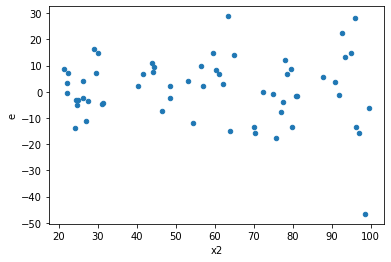

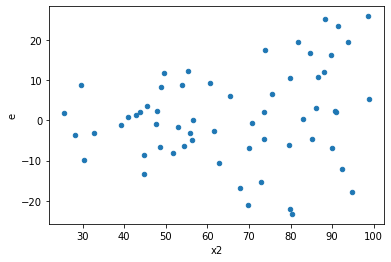

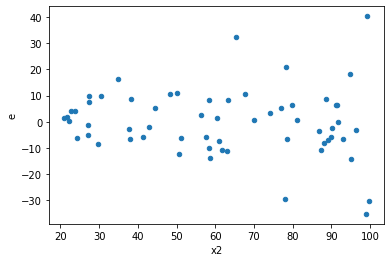

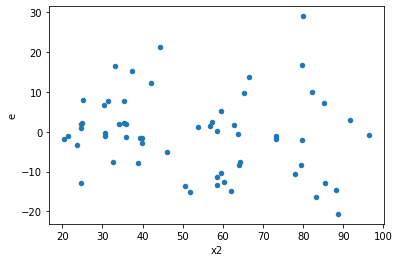

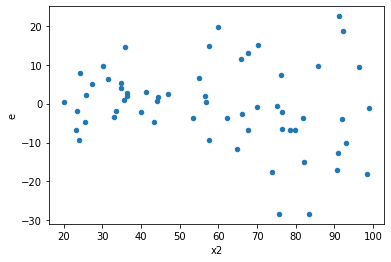

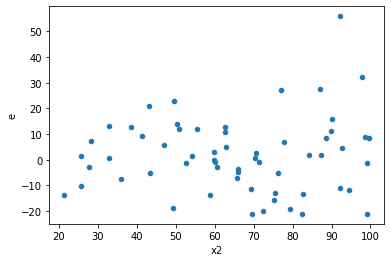

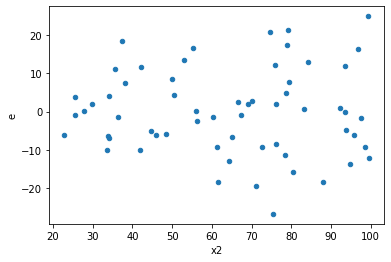

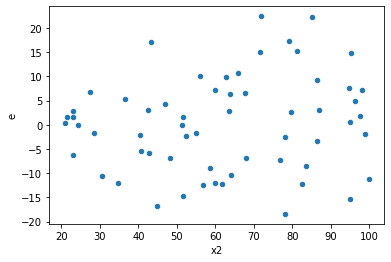

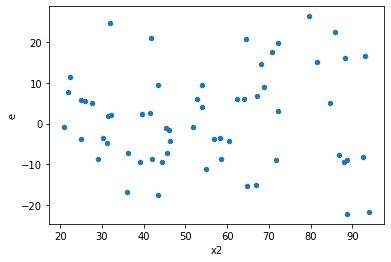

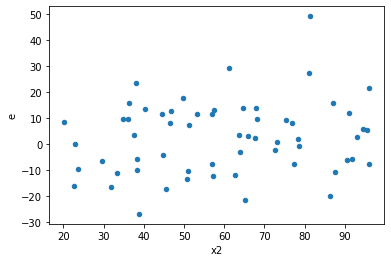

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,1379.0996401129703,4817.087181219023,62.68634727786229,218.9585082372283,3.492921788323015,0.004891311561070477,0.9975543442194648,0.0024456557805352386,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,1417.9295600820212,3499.2898523097906,64.45134364009188,159.05862965044503,2.467886946448434,0.039305740233781084,0.9803471298831095,0.019652870116890542,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,1571.7118336208362,5753.007250023754,71.44144698276529,261.50032954653426,3.660344808100251,0.003577361131531953,0.998211319434234,0.0017886805657659766,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,1809.4969994447906,2669.883551084557,82.24986361112684,121.35834323111622,1.4754838233518814,0.368566346928181,0.8157168265359095,0.1842831734640905,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,1217.8707406274873,2892.646714128426,55.35776093761306,131.4839415512921,2.375167263348522,0.04813497990674431,0.9759325100466278,0.024067489953372156,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,2525.007781641129,4716.135570877851,114.77308098368768,214.36979867626596,1.8677707075471264,0.15065697656502874,0.9246715117174856,0.07532848828251437,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,2113.9664213335514,3646.4217390592976,96.0893827878887,165.74644268451354,1.7249194226836533,0.20893141603722687,0.8955342919813866,0.10446570801861343,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,1711.6871918720462,2556.0028287424543,77.8039632669112,116.18194676102065,1.4932651484918764,0.3540955800600756,0.8229522099699622,0.1770477900300378,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,2541.373960216274,3681.07694697679,115.51699819164882,167.32167940803592,1.4484593785101685,0.3916237986527278,0.8041881006736361,0.1958118993263639,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,1379.0996401129703,4817.087181219023,62.68634727786229,218.9585082372283,3.492921788323015,0.004891311561070477,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,1417.9295600820212,3499.2898523097906,64.45134364009188,159.05862965044503,2.467886946448434,0.039305740233781084,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,1571.7118336208362,5753.007250023754,71.44144698276529,261.50032954653426,3.660344808100251,0.003577361131531953,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,1809.4969994447906,2669.883551084557,82.24986361112684,121.35834323111622,1.4754838233518814,0.368566346928181,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,1217.8707406274873,2892.646714128426,55.35776093761306,131.4839415512921,2.375167263348522,0.04813497990674431,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,2525.007781641129,4716.135570877851,114.77308098368768,214.36979867626596,1.8677707075471264,0.15065697656502874,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,2113.9664213335514,3646.4217390592976,96.0893827878887,165.74644268451354,1.7249194226836533,0.20893141603722687,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,1711.6871918720462,2556.0028287424543,77.8039632669112,116.18194676102065,1.4932651484918764,0.3540955800600756,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,2541.373960216274,3681.07694697679,115.51699819164882,167.32167940803592,1.4484593785101685,0.3916237986527278,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      839
Reject001=0 : Heteroscedasticity    161
Name: Result_test, dtype: int64